# ASSIGNMENT 4: DA24C005


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import auc
from sklearn.base import BaseEstimator
from scipy.stats import bernoulli
from collections import Counter


#TASK 1

Using Base Estimator class of sklearn to implement DummyClassifier.

It returns a random label in {True, False} for any test input

In [ ]:
class RandomBinaryClassifier(BaseEstimator):

  def __init__(self, p=0.5, method='uniform_random'):
    self.p = 0.5 if p < 0.0 or p > 1.0 else p
    self.method = method if method in ["uniform_random", "bernoulli", "normal"] else "uniform_random"

  def fit(self, X, y=None):
    """Since training is not required, function does nothing"""
    pass

  def predict(self, X):

    """The function returns 0 or 1 value randomly, based on chosen distribution

    - Normal method: generates random values from a gaussian distribution.
    Since we need values in the interval [0,1], we translate the mean by adding 0.5.
    Also, we divide the values by 6 to try to bring |3σ| within 0 and 1 after adding 0.5

    - Bernoulli method: It generate random samples from a Bernoulli distribution based
    on the specified parameter p.

    -  Uniform method: generates random numbers uniformly distributed between 0 and 1."""

    if self.method == "normal":
      return (0.5 + np.random.randn(len(X))/6) < self.p


    elif self.method == "bernoulli":
      return np.bool_(bernoulli.rvs(self.p, size=len(X)))

    else:
      return np.random.rand(len(X)) < self.p


We create a dataset of 1000 instances.

If the number of samples are increased, the plots tend to become a straight line.

In [ ]:
X = np.random.rand(100)

checking the label distribution for an arbitrary value of p and normal distribution

In [ ]:
cla = RandomBinaryClassifier(p=0.3, method='normal')
y = cla.predict(X)
c = Counter(y)
{i[0]: i[1] / len(y) for i in c.items()}

{False: 0.91, True: 0.09}

Function to compute label prior

In [ ]:
def compute_label_prior(y):
    c = Counter(y)
    ratio = {i[0]:i[1]/len(y) for i in c.items()}
    if True not in ratio:
        ratio[True] = 0.0
    if False not in ratio:
        ratio[False] = 0.0
    return ratio

Computing ratio of true values for different p values using different methods

In [ ]:
p_vals = np.arange(0., 1.01, 0.1)
true_bern = []
true_norm = []
true_uni = []
for p in p_vals:
    cla = RandomBinaryClassifier(p=p, method='bernoulli')
    y = cla.predict(X)
    ratio = compute_label_prior(y)
    true_bern.append(ratio[True])
    y = RandomBinaryClassifier(p=p, method='normal').predict(X)
    true_norm.append(compute_label_prior(y)[True])
    y = RandomBinaryClassifier(p=p, method='uniform_random').predict(X)
    true_uni.append(compute_label_prior(y)[True])

Plotting the ratio of true values for different p values and different methods

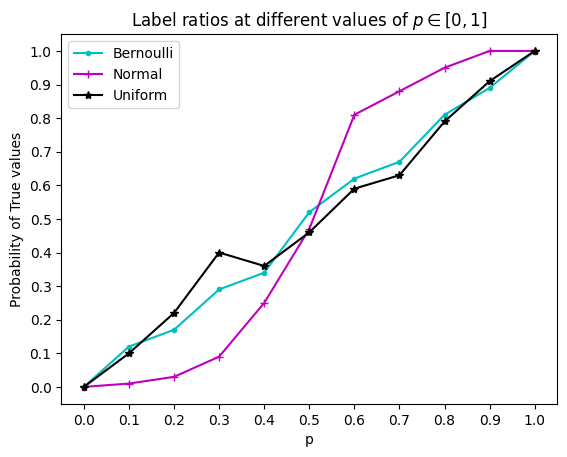

In [ ]:
import matplotlib.pyplot as plt
plt.plot(p_vals, true_bern, 'c.-')
plt.plot(p_vals, true_norm, 'm+-')
plt.plot(p_vals, true_uni, 'k*-')
plt.xlabel('p')
plt.ylabel('Probability of True values')
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Label ratios at different values of $p\in[0,1]$')
plt.legend(['Bernoulli','Normal','Uniform'], loc='upper left')
plt.show()

# TASK 2

In [ ]:
iris = load_iris()
iris_data = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target

In [ ]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_data['target'].value_counts()

,count
target,
0,50
1,50
2,50


From the above table, we can view that there are 50 flowers of type 0,1, 2

In [ ]:
zeros_list = np.zeros(100).tolist()
ones_list = np.ones(50).tolist()
comb_list = zeros_list + ones_list
comb_list = [int(i) for i in comb_list]
iris_data['target'] = comb_list

In [ ]:
iris_data['target'].value_counts()

,count
target,
0,100
1,50


We converted the 3-class dataset into a binary class dataset.

In [ ]:
x_train = iris_data.iloc[:,:-1]
y_train = iris_data.iloc[:,-1].values

There are (50/150) = 33.33% of Trues (1's) and (100/150) = 66.66 % Falses(O's).

Hence, we use label prior for the Random classifier as p = 0.33

In [ ]:
iris_clsfr = RandomBinaryClassifier(method='bernoulli', p=0.33)
pred_y = iris_clsfr.predict(x_train)

Label Prior of the Iris dataset

In [ ]:
prior = compute_label_prior(pred_y)
print(prior)

{False: 0.6666666666666666, True: 0.3333333333333333}


Using different values of p

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
prec_list, rec_tpr_list , f1_score_list , fpr_list = [],[],[],[]
for i in np.arange(0,1.1,0.1):
  iris_clsfr = RandomBinaryClassifier(method='bernoulli', p=i)
  y_pred = iris_clsfr.predict(x_train)
  precision = precision_score(y_train, y_pred)
  rec = recall_score(y_train, y_pred)
  f1 = f1_score(y_train, y_pred)
  fpr = 1 - rec
  prec_list.append(precision)
  rec_tpr_list.append(rec)
  f1_score_list.append(f1)
  fpr_list.append(fpr)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


P, R, F1 Line Plots

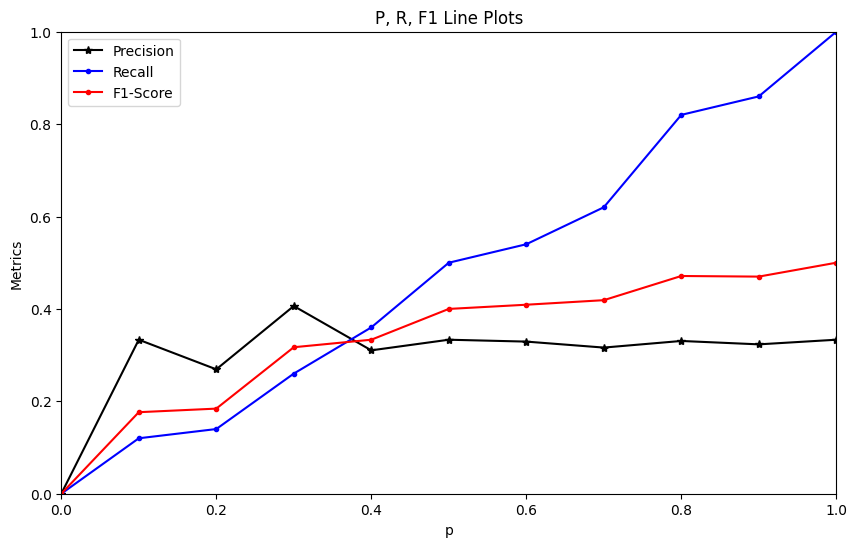

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,1.1,0.1),prec_list, 'k*-')
plt.plot(np.arange(0,1.1,0.1), rec_tpr_list, 'b.-')
plt.plot(np.arange(0,1.1,0.1), f1_score_list, 'r.-')
plt.xlabel("p")
plt.ylabel("Metrics")
plt.legend(['Precision', 'Recall', 'F1-Score'])
plt.title("P, R, F1 Line Plots")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

Precison Recall Curve

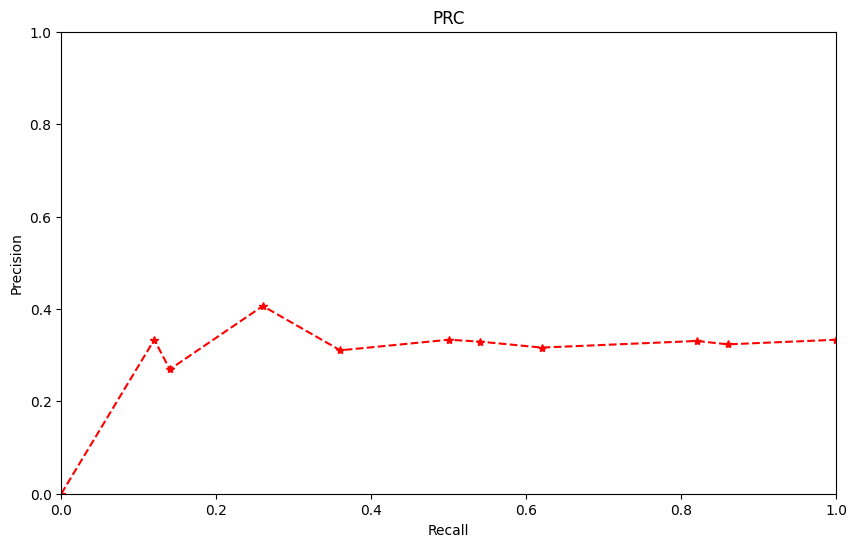

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(rec_tpr_list, prec_list, 'r*--')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [ ]:
fpr_list.reverse()

Plotting ROC

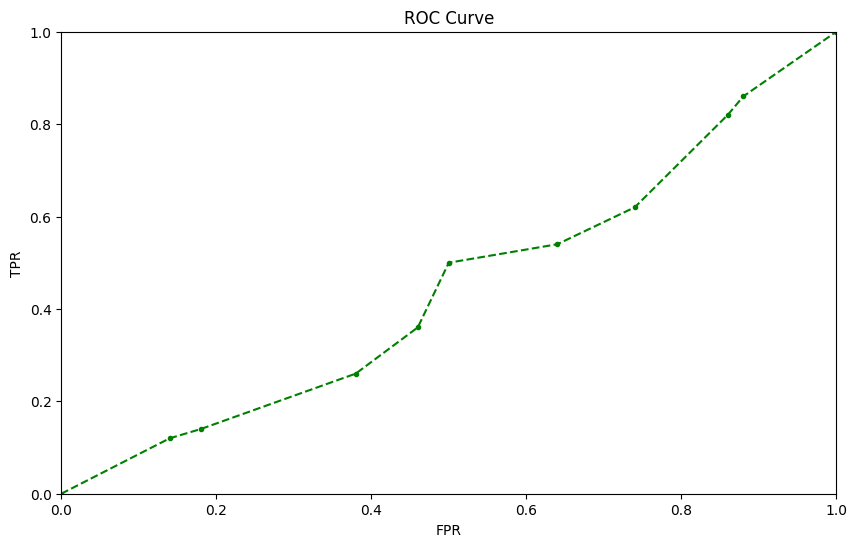

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, rec_tpr_list, 'g.--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("ROC Curve")
plt.show()

Reporting AUPRC and AURoC

In [ ]:
auprc = auc(np.sort(rec_tpr_list), np.sort(prec_list))
print(f'AUPRC: {auprc}')

auroc = auc(np.sort(fpr_list), np.sort(rec_tpr_list))
print(f'AURoC: {auroc}')

AUPRC: 0.30874022531128775
AURoC: 0.4412


##TASK 3 - Plotting Decison Boundaries

To plot the decision boundaries, we will use sepal width and sepal length features

In [ ]:
X = iris_data.loc[:,['sepal width (cm)', 'sepal length (cm)']]

In [ ]:
x1 = X[X.columns[0]]
x2 = X[X.columns[1]]
grid_x1 = np.linspace(x1.min(), x1.max(), 100)
grid_x2 = np.linspace(x2.min(), x2.max(), 100)
x1v, x2v = np.meshgrid(grid_x1, grid_x2)

In [ ]:
x_train = pd.DataFrame(data=np.column_stack((x1v.flatten(), x2v.flatten())), columns=X.columns)

In [ ]:
pred_y = RandomBinaryClassifier(method='bernoulli', p=0.5).predict(x_train)

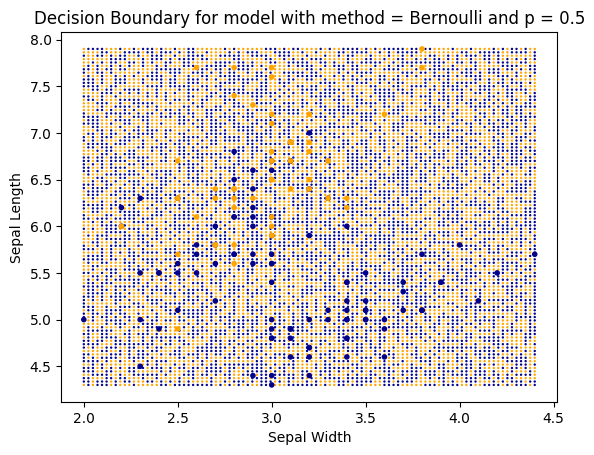

In [ ]:
color_map = {0: 'darkblue', 1: 'orange'}
plt.scatter(x1v, x2v, marker='.', s=2, c=[color_map[label] for label in pred_y])
plt.scatter(x1, x2, marker='.', c=[color_map[label] for label in y_train])
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.title("Decision Boundary for model with method = Bernoulli and p = 0.5")
plt.show()

#### Function to plot decision boundaries

In [ ]:
def decision_boundary(x_train, y, model, ax = None):
    pred_y = model.predict(x_train)
    color_map = {0: 'darkblue', 1: 'orange'}
    ax.scatter(x1v, x2v, marker='.', s=2, c= [color_map[label] for label in pred_y])
    ax.scatter(x1, x2, marker='.', c=[color_map[label] for label in y])

### Decision boundaries for bernoulli method and different values of p

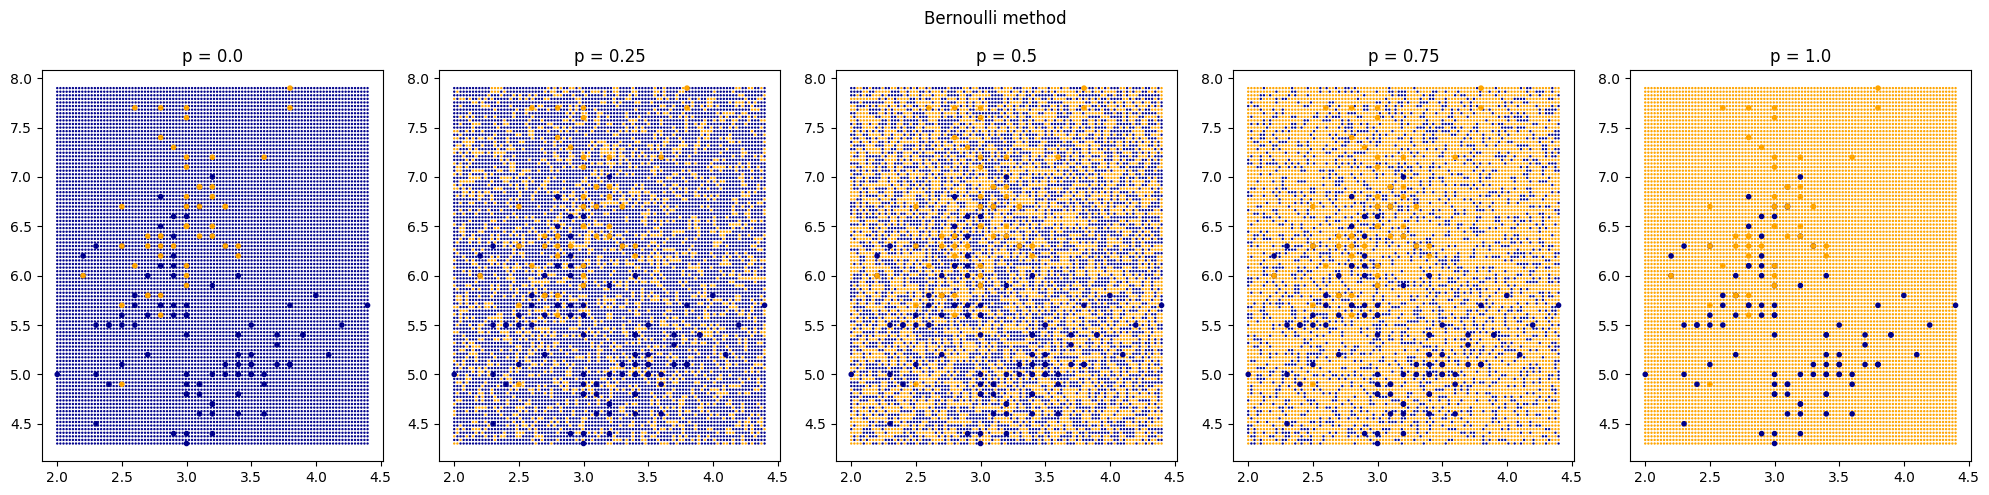

In [ ]:
fig, axes = plt.subplots(1, 5, figsize = (20,5))

p_values = np.arange(0,1.1,0.25)
for i, p_value in enumerate(p_values):
  axes[i].set_title(f"p = {p_value}")
  model = RandomBinaryClassifier(method="bernoulli", p=p_value)
  decision_boundary(x_train, y_train, model, ax=axes[i])
plt.suptitle("Bernoulli method")
plt.tight_layout()
plt.show()

### Decision boundaries for uniform method and different values of p

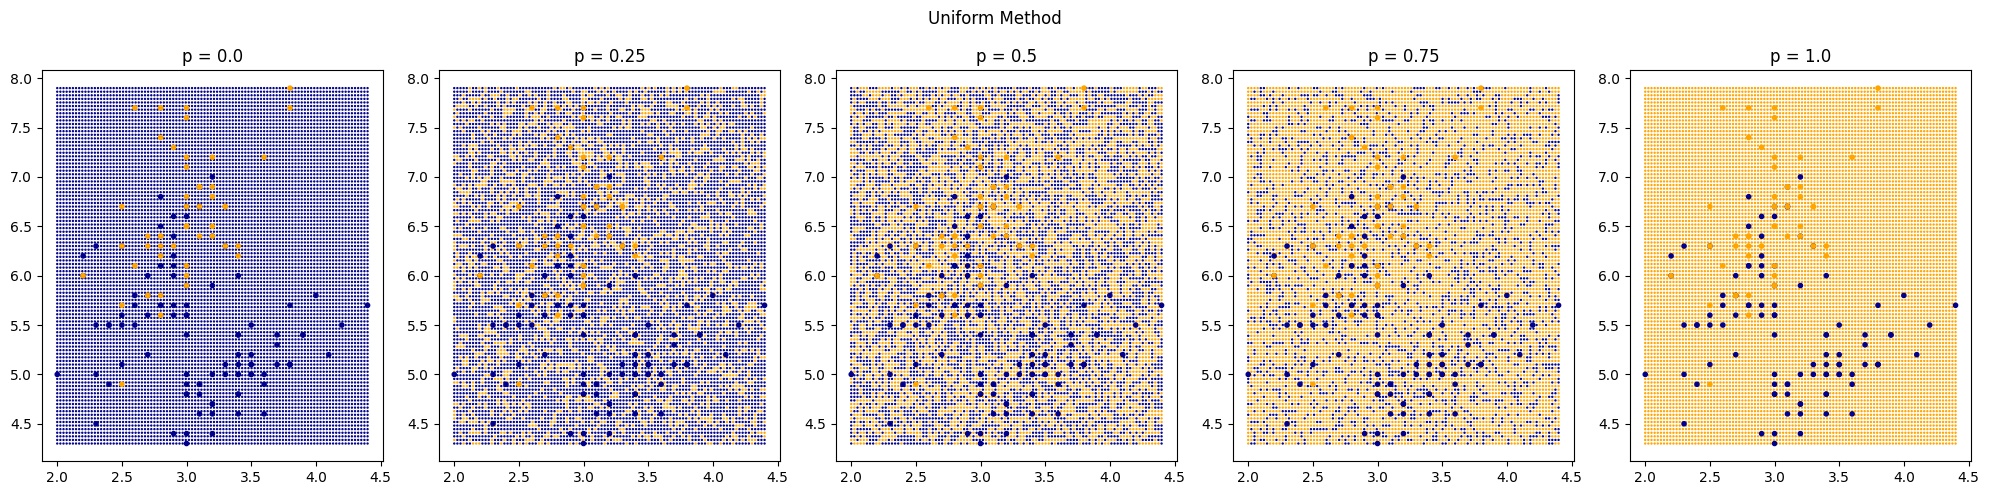

In [ ]:
fig, axes = plt.subplots(1, 5, figsize = (20,5))
p_values = np.arange(0,1.1,0.25)
for i, p_value in enumerate(p_values):
  axes[i].set_title(f"p = {p_value}")
  model = RandomBinaryClassifier(method="uniform", p=p_value)
  decision_boundary(x_train, y_train, model, ax=axes[i])

plt.suptitle("Uniform Method")
plt.tight_layout()
plt.show()

### Decision boundaries for normal method and different values of p

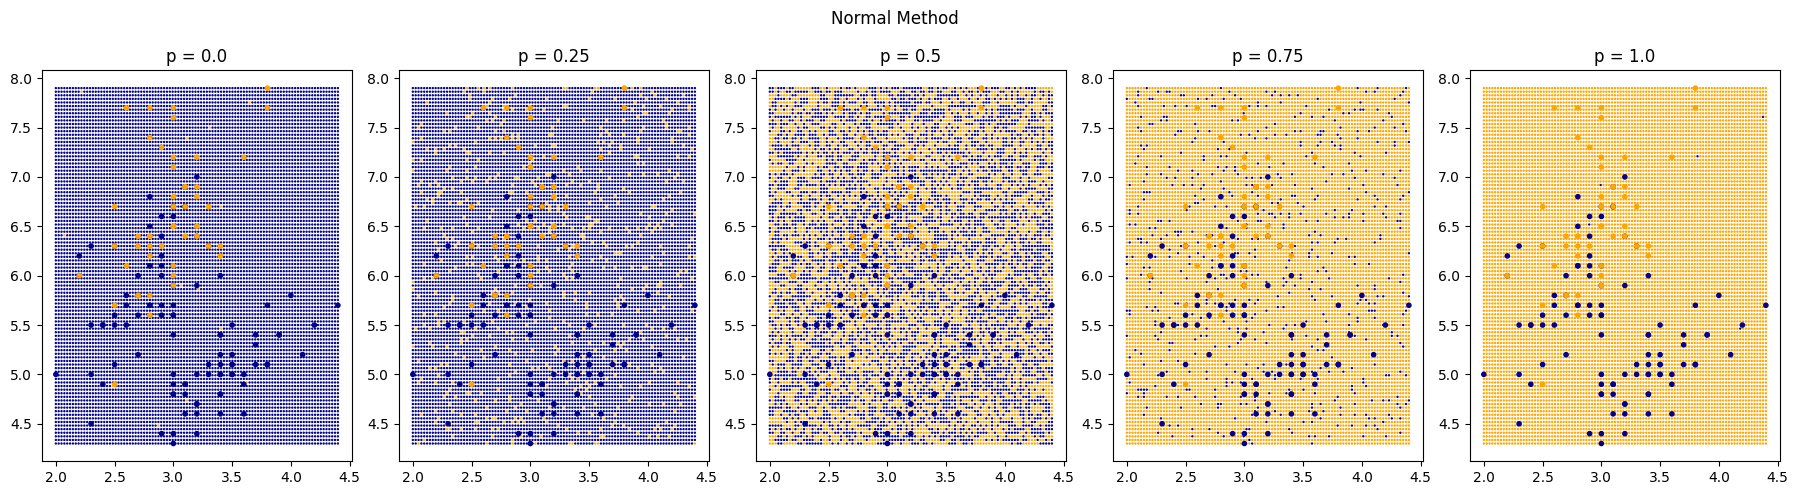

In [ ]:
fig, axes = plt.subplots(1, 5, figsize = (18,5))
p_values = np.arange(0,1.1,0.25)
for i, p_value in enumerate(p_values):
  axes[i].set_title(f"p = {p_value}")
  model = RandomBinaryClassifier(method="normal", p=p_value)
  decision_boundary(x_train, y_train, model, ax=axes[i])

plt.suptitle("Normal Method")
plt.tight_layout()
plt.show()

### Since our classifier is random, it makes random predictions for every input label. So, we dont get a meaningful pattern and thus our decision boundary is scattered